In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\EMPLOYEE ATTRITION PROJECT\Analyzing Employee Trends.csv")
print(df.head())
print("uniques")
print(df[['attrition', 'department', 'job_role', 'marital_status', 'gender', 'education', 'education_field', 'business_travel']].nunique())


   emp_no  gender marital_status age_band  age department          education  \
0   10001  Female         Single  35 - 44   41      Sales  Associates Degree   
1   10002    Male        Married  45 - 54   49        R&D        High School   
2   10003    Male         Single  35 - 44   37        R&D  Associates Degree   
3   10004  Female        Married  25 - 34   33        R&D    Master's Degree   
4   10005    Male        Married  25 - 34   27        R&D        High School   

  education_field               job_role    business_travel  employee_count  \
0   Life Sciences        Sales Executive      Travel_Rarely               1   
1   Life Sciences     Research Scientist  Travel_Frequently               1   
2           Other  Laboratory Technician      Travel_Rarely               1   
3   Life Sciences     Research Scientist  Travel_Frequently               1   
4         Medical  Laboratory Technician      Travel_Rarely               1   

  attrition    attrition_label  job_satisfac

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df.columns = df.columns.str.strip()
df['attrition'] = label_encoder.fit_transform(df['attrition'])

categorical_cols = ['department', 'job_role', 'marital_status', 'gender', 'education', 'education_field', 'business_travel']

for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame")


In [4]:
print(df[categorical_cols].head(10))  # See if text values changed to numbers


   department  job_role  marital_status  gender  education  education_field  \
0           2         7               2       0          0                1   
1           1         6               1       1          3                1   
2           1         2               2       1          0                4   
3           1         6               1       0          4                1   
4           1         2               1       1          3                3   
5           1         2               2       1          0                1   
6           1         2               1       0          1                3   
7           1         2               0       1          3                1   
8           1         4               2       1          1                1   
9           1         0               1       1          1                3   

   business_travel  
0                2  
1                1  
2                2  
3                1  
4                2  
5   

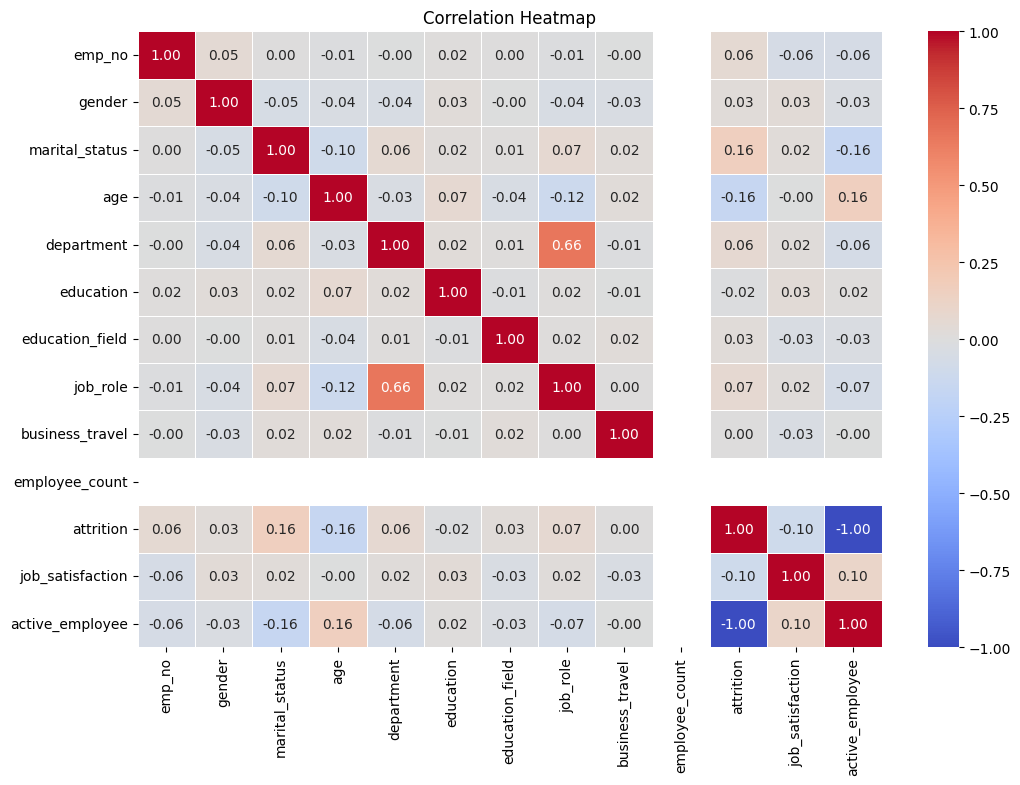

In [7]:

label_encoders = {}
categorical_cols = ['attrition', 'department', 'job_role', 'marital_status', 
                    'gender', 'education', 'education_field', 'business_travel']

for col in categorical_cols:
    if col in df.columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
